<a href="https://colab.research.google.com/github/Antel0pe/VoronoiDiagrams/blob/main/HURDAT2_Voronoi_Diagrams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import json

# Assuming hurdat2.json is uploaded to the Colab environment
try:
  with open('processed-hurdat2.json', 'r') as f:
    data = json.load(f)
    # Now you can work with the 'data' variable, which contains the JSON data.
    # Example: Print the keys of the first item
    print(data)

except FileNotFoundError:
    print("Error: hurdat2.json not found. Please upload the file.")
except json.JSONDecodeError:
    print("Error: Invalid JSON format in hurdat2.json")


[{'storm_id': '1950', 'name': 'ABLE', 'num_records': 51, 'observations': [{'date': '1950-08-12', 'time': '00:00 UTC', 'latitude': 17.1, 'longitude': -55.5, 'wind_speed': 35, 'pressure': -999}, {'date': '1950-08-12', 'time': '06:00 UTC', 'latitude': 17.7, 'longitude': -56.3, 'wind_speed': 40, 'pressure': -999}, {'date': '1950-08-12', 'time': '12:00 UTC', 'latitude': 18.2, 'longitude': -57.4, 'wind_speed': 45, 'pressure': -999}, {'date': '1950-08-12', 'time': '18:00 UTC', 'latitude': 19.0, 'longitude': -58.6, 'wind_speed': 50, 'pressure': -999}, {'date': '1950-08-13', 'time': '00:00 UTC', 'latitude': 20.0, 'longitude': -60.0, 'wind_speed': 50, 'pressure': -999}, {'date': '1950-08-13', 'time': '06:00 UTC', 'latitude': 20.7, 'longitude': -61.1, 'wind_speed': 50, 'pressure': -999}, {'date': '1950-08-13', 'time': '12:00 UTC', 'latitude': 21.3, 'longitude': -62.2, 'wind_speed': 55, 'pressure': -999}, {'date': '1950-08-13', 'time': '18:00 UTC', 'latitude': 22.0, 'longitude': -63.2, 'wind_speed

In [17]:
latLongs = []
latLongLookup = {}

for storm in data:
    for obs in storm['observations']:
        latLongs.append((obs['latitude'], obs['longitude']))
        latLongLookup[(obs['latitude'], obs['longitude'])] = storm['name'] + ' ' + storm['storm_id'] + ' ' + obs['date'] + ' ' + obs['time']

print(latLongs)
print(latLongLookup)

[(17.1, -55.5), (17.7, -56.3), (18.2, -57.4), (19.0, -58.6), (20.0, -60.0), (20.7, -61.1), (21.3, -62.2), (22.0, -63.2), (22.7, -63.8), (23.1, -64.6), (23.4, -65.4), (23.9, -66.0), (24.4, -66.2), (24.8, -66.5), (25.2, -66.8), (25.5, -67.5), (25.7, -68.1), (25.7, -68.7), (25.5, -69.3), (25.4, -69.8), (25.4, -70.6), (25.4, -71.5), (25.5, -72.6), (25.9, -73.3), (26.7, -73.9), (27.3, -74.4), (27.9, -74.9), (28.4, -75.3), (29.1, -75.5), (29.9, -75.5), (30.7, -75.5), (31.7, -75.5), (32.8, -75.2), (34.4, -74.3), (36.0, -72.7), (37.6, -71.0), (39.3, -69.4), (41.2, -67.3), (43.3, -65.0), (44.6, -63.7), (45.5, -62.6), (47.9, -59.8), (50.0, -56.8), (52.0, -53.8), (53.6, -50.7), (54.7, -47.7), (55.3, -44.8), (55.3, -41.8), (54.5, -37.7), (53.5, -33.7), (52.5, -30.3), (12.0, -54.0), (12.5, -54.2), (13.0, -54.4), (13.5, -54.7), (14.0, -55.0), (14.5, -55.4), (15.0, -55.9), (15.5, -56.4), (16.0, -57.0), (16.3, -57.9), (16.6, -58.8), (16.8, -59.8), (16.9, -60.6), (17.0, -61.0), (17.0, -61.4), (16.9, -6

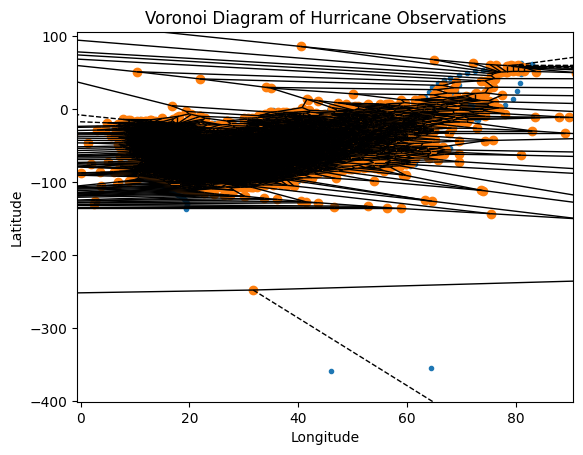

In [4]:
# prompt: generate and plot voronoi diagram with scipy spatial

import json
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

# Generate Voronoi diagram
vor = Voronoi(latLongs)

# Plot the Voronoi diagram
fig = voronoi_plot_2d(vor)
plt.title("Voronoi Diagram of Hurricane Observations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Nearest Point Index: 0
Distance: 0.0000
Nearest Point: [ 17.1 -55.5]
Associated Storm: ABLE 1950 1950-08-12 00:00 UTC


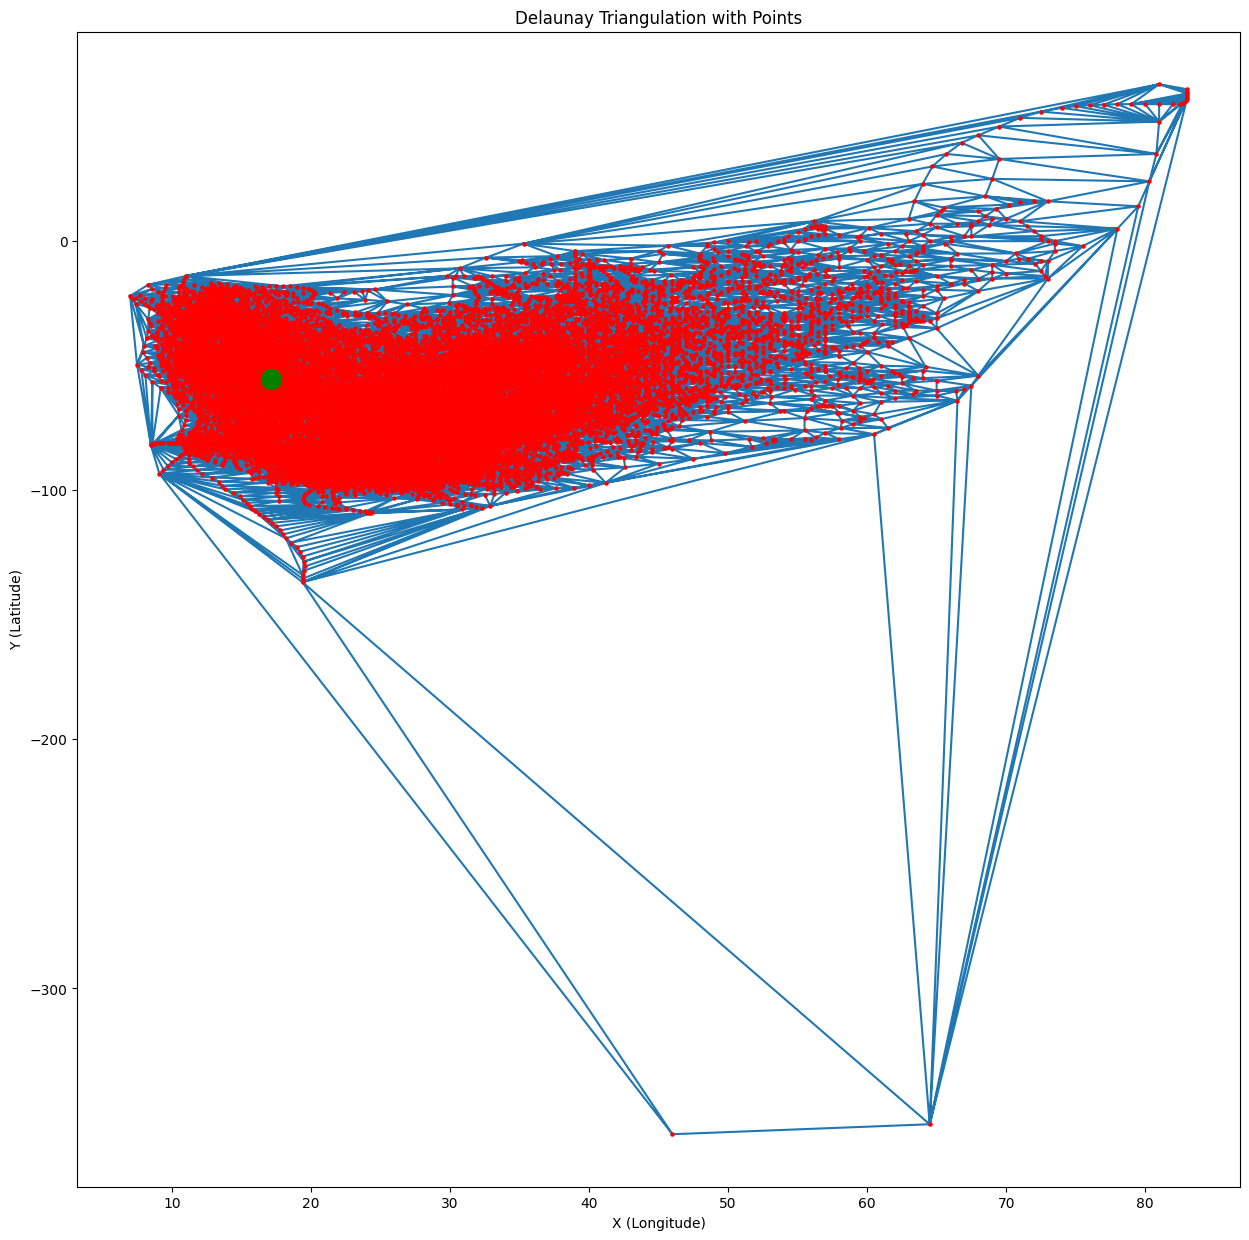

In [26]:
import numpy as np
from scipy.spatial import Voronoi, Delaunay
import matplotlib.pyplot as plt

class EfficientVoronoiLocator:
    def __init__(self, points):
        """
        Initialize the locator with a set of points.

        Parameters:
        points (np.ndarray): Array of points with shape (n, 2)
        """
        self.points = points

        # Compute Delaunay triangulation for efficient spatial indexing
        self.delaunay = Delaunay(points)

        # Compute Voronoi diagram
        self.voronoi = Voronoi(points)

    def find_nearest_point(self, target_point, give_second_closest=False):
        """
        Find the nearest point efficiently using Delaunay triangulation.

        Parameters:
        target_point (np.ndarray): Target point to find nearest neighbor for

        Returns:
        tuple: (index, distance, nearest_point)
        """
        # First, find which simplex (triangle) contains the point
        simplex_index = self.delaunay.find_simplex(target_point)

        if simplex_index == -1:
            # If point is outside the convex hull, use brute force
            distances = np.sqrt(np.sum((self.points - target_point)**2, axis=1))
            nearest_index = np.argmin(distances)
        else:
            # Get the indices of points in the containing simplex
            simplex_indices = self.delaunay.simplices[simplex_index]

            # Calculate distances to these points
            local_points = self.points[simplex_indices]
            local_distances = np.sqrt(np.sum((local_points - target_point)**2, axis=1))

            if give_second_closest:
                # Find the second nearest point
                second_nearest_index = np.argsort(local_distances)[1]
                nearest_index = simplex_indices[second_nearest_index]
            else:
                # Find the nearest point among these
                local_nearest_index = np.argmin(local_distances)
                nearest_index = simplex_indices[local_nearest_index]

        # Calculate final distance and nearest point
        nearest_point = self.points[nearest_index]
        distance = np.linalg.norm(nearest_point - target_point)

        return nearest_index, distance, nearest_point

    def plot(self, highlight_point=None):
        """
        Visualize the points and optionally a specific point.

        Parameters:
        highlight_point (np.ndarray, optional): Point to highlight
        """
        plt.figure(figsize=(15, 15))

        # Plot Delaunay triangulation
        plt.triplot(self.points[:, 0], self.points[:, 1],
                    self.delaunay.simplices)

        # Plot original points
        plt.scatter(self.points[:, 0], self.points[:, 1],
                    color='red', s=5, zorder=10)

        # Highlight specific point if provided
        if highlight_point is not None:
            plt.scatter(highlight_point[0], highlight_point[1],
                        color='green', s=200, zorder=15)

        plt.title('Delaunay Triangulation with Points')
        plt.xlabel('X (Longitude)')
        plt.ylabel('Y (Latitude)')
        plt.show()

# Example usage
def example_usage():
    # Sample points (e.g., hurricane locations)
    points = np.array(latLongs)

    # Create locator
    locator = EfficientVoronoiLocator(points)

    # Target point to find nearest neighbor
    target_point = np.array([17.1, -55.5])

    # Find nearest point
    index, distance, nearest_point = locator.find_nearest_point(target_point, True)
    associatedStorm = latLongLookup[(nearest_point[0], nearest_point[1])]

    print(f"Nearest Point Index: {index}")
    print(f"Distance: {distance:.4f}")
    print(f"Nearest Point: {nearest_point}")
    print(f"Associated Storm: {associatedStorm}")

    # Visualize
    locator.plot(highlight_point=target_point)

# Uncomment to run example
example_usage()